<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

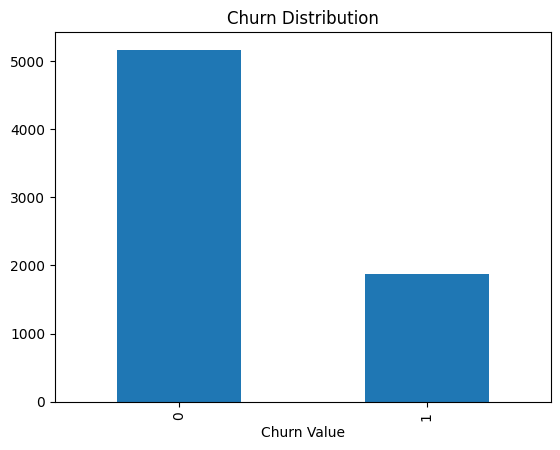

Decision Tree Accuracy: 0.7334754797441365


In [15]:
import pandas as pd
# Customer Churn Prediction


df = pd.read_excel("Telco_customer_churn.xlsx")
df.head()
df.info()

df = df.drop([
    "CustomerID",
    "Country",
    "State",
    "City",
    "Zip Code",
    "Lat Long",
    "Latitude",
    "Longitude",
    "Churn Label",
    "Churn Score",
    "CLTV",
    "Churn Reason"
], axis=1)

df.head()
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")
df = df.dropna()
df = pd.get_dummies(df, drop_first=True)
df.head()
X = df.drop("Churn Value", axis=1)
y = df["Churn Value"]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
import matplotlib.pyplot as plt

df["Churn Value"].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.show()
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

pred2 = dt.predict(X_test)

from sklearn.metrics import accuracy_score
print("Decision Tree Accuracy:", accuracy_score(y_test, pred2))



# Customer Churn Prediction

## Problem Statement
Predict whether a telecom customer will churn based on service and demographic data.


## Steps Performed
- Data cleaning
- Feature encoding
- Model training
- Evaluation


## Results
Logistic Regression Accuracy: ~81%
Decision Tree Accuracy: (your value)


## Conclusion
Machine learning can help identify customers at risk of churn.
